In [1]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt
from PIL import ImageEnhance 

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            base[x,y] = exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [3]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealHP(D0,image,u,v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if distance((x,y),(u,v)) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [4]:
def hor_line(D0, image, u):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [5]:
def ver_line(D0, image, v):
    base = np.zeros(image.shape)
    rows, cols = image.shape
    for y in range(cols):
        for x in range(rows):
            if abs(y-v) <= D0:
                base[x,y] = 1
            else:
                base[x,y] = 0
    return base

In [6]:
def norm_img(image):
    return((image - np.min(image))/(np.max(image)-np.min(image)))*255

In [7]:
images4 = [cv2.imread(file,0) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p4/II/*.jpg")]

# image 1(vertical):

In [8]:
a,b = images4[0].shape
c,d = a/2,b/6
e,f = (a/2-c)*2 + c , (b/2-d)*2 + d
g,h = a/2,1
i,j = (a/2-g)*2 + g , (b/2-h)*2 + h
k = a/2
kk = b/2
m,n = a/2,b/2
#o,p = (a/2-m)*2 + m , (b/2-n)*2 + n
q,r = a/2,b/3
s,t = (a/2-q)*2 + q , (b/2-r)*2 + r

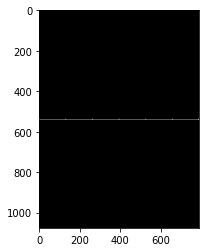

In [9]:
illusion = np.ones(np.shape(images4[0]))
bs1 = gaussianHP(2,illusion,c,d)
bs2 = gaussianHP(2,illusion,e,f)
bs3 = gaussianHP(2,illusion,g,h)
bs4 = gaussianHP(2,illusion,i,j)
bs5 = hor_line(1.5, illusion, k)
bs6 = gaussianHP(2,illusion,m,n)
bs9 = gaussianHP(2,illusion,g,h)
bs10 = gaussianHP(2,illusion,i,j)
bs7 = gaussianHP(2,illusion,q,r)
bs8 = gaussianHP(2,illusion,s,t)
# bs12 = ver_line(3, illusion, kk)
# bs11 = gaussianHP(0.25,illusion,o,p)
illusion = (bs1+bs2+bs3+bs4+bs6+bs9+bs10+bs7+bs8+bs5)*illusion
plt.imshow(illusion,'gray')

In [10]:
illusion = np.ones(np.shape(images4[0]))
illusion = (bs1+bs2+bs3+bs4+bs6+bs9+bs10+bs7+bs8+bs5)*illusion

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


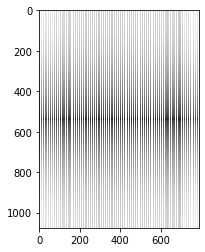

In [11]:
new = np.fft.ifftshift(illusion)
new = np.fft.ifft2(new)
vertical = np.log(np.real(new))
plt.imshow(vertical,'gray')

# image 2(horizontal):

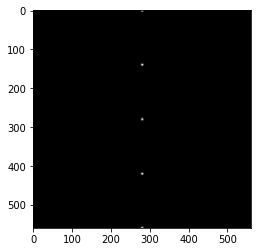

In [12]:
a,b = images4[1].shape
c,d = a/4,b/2
e,f = (a/2-c)*2 + c , (b/2-d)*2 + d
g,h = 1,b/2
i,j = (a/2-g)*2 + g , (b/2-h)*2 + h
k = b/2
m,n = a/2,b/2
o,p = (a/2-m)*2 + m , (b/2-n)*2 + n
illusion = np.ones(np.shape(images4[1]))
bs1 = gaussianHP(2,illusion,c,d)
bs2 = gaussianHP(2,illusion,e,f)
bs3 = gaussianHP(2,illusion,g,h)
bs4 = gaussianHP(2,illusion,i,j)
#bs5 = ver_line(1, illusion, k)
bs6 = gaussianHP(2,illusion,m,n)
#bs7 = gaussianHP(0.25,illusion,o,p)
illusion = (bs1+bs2+bs3+bs4+bs6)*illusion
plt.imshow(illusion,'gray')

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


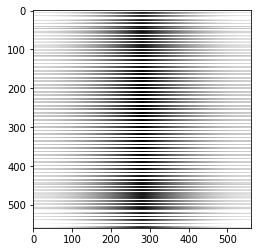

In [13]:
new = np.fft.ifftshift(illusion)
new = np.fft.ifft2(new)
horizontal = np.log(np.real(new))
plt.imshow(horizontal,'gray')

# image 3(diagonal):

In [14]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.zeros(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            base[x,y] = exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

def hor_line(D0, image, u):
    base = np.zeros(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 1
    return base

def ver_line(D0, image, v):
    base = np.zeros(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if abs(y-v) <= D0:
                base[x,y] = 1
    return base

def notch_gauss(image, x, y,D0):
    a,b = image.shape
    filt1 = gaussianHP(D0, image, x, y)
    filt2 = gaussianHP(D0, image, (a/2-x)*2 + x, (b/2-y)*2 + y)
    filt = filt1+filt2
    return filt

def notch_hor(image, x, D0):
    a,b = image.shape
    filt1 = hor_line(D0, image, x)
    filt2 = hor_line(D0, image, (a/2-x)*2 + x)
    filt = filt1+filt2
    return filt

def notch_ver(image, x, D0):
    a,b = image.shape
    filt1 = ver_line(D0, image, x)
    filt2 = ver_line(D0, image, (b/2-x)*2 + x)
    filt = filt1+filt2
    return filt


In [15]:
bs = np.zeros(np.shape(images4[2]))
a,b = images4[2].shape
coordinates_gauss = [[a/2,b/2],[a*13/30,b*13/30]]
D0 = 1
for coors in coordinates_gauss:
    bs += notch_gauss(bs, coors[0],coors[1] ,D0)

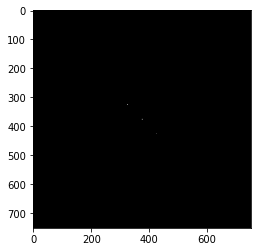

In [16]:
plt.imshow(bs,'gray')

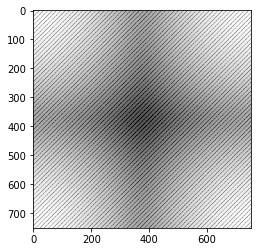

In [17]:
new = np.fft.ifftshift(bs)
new = np.fft.ifft2(new)
diagonal = np.log(np.real(new))
plt.imshow(diagonal,'gray')

# part d:

In [18]:
images = np.array([cv2.imread(file,0) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p4/II/*.jpg")])

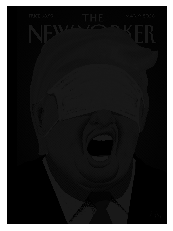

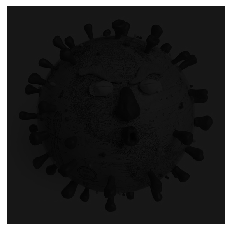

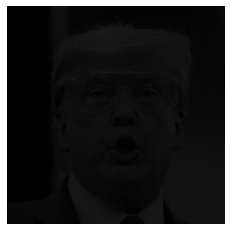

In [19]:
img = Image.fromarray(images[0])
im = ImageEnhance.Brightness(img)
im1 = im.enhance(0.1)
im1 = np.array(im1)
plt.imshow(im1,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

img = Image.fromarray(images[1])
im = ImageEnhance.Brightness(img)
im2 = im.enhance(0.1)
im2 = np.array(im2)
plt.imshow(im2,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

img = Image.fromarray(images[2])
im = ImageEnhance.Brightness(img)
im3 = im.enhance(0.1)
im3 = np.array(im3)
plt.imshow(im3,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [20]:
ver = vertical
from numpy import isnan
where_are_NaNs = isnan(ver)
ver[where_are_NaNs] = 255
ver = np.clip(ver,0,255)

hor = horizontal
from numpy import isnan
where_are_NaNs = isnan(hor)
hor[where_are_NaNs] = 255
hor = np.clip(hor,0,255)

dia = norm_img(diagonal.astype(np.int))
# dia = diagonal
from numpy import isnan
where_are_NaNs = isnan(dia)
dia[where_are_NaNs] = 255
dia = np.clip(dia,0,255)

In [21]:
illusion1 = im1 + ver
illusion2 = im2 + hor
illusion3 = im3 + dia

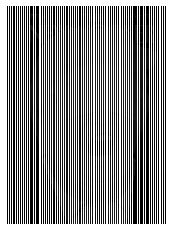

In [22]:
plt.imshow(illusion1,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

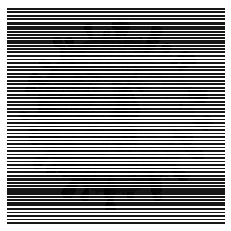

In [23]:
plt.imshow(illusion2,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

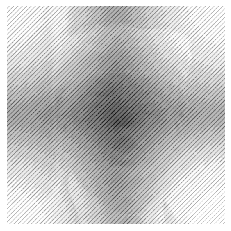

In [24]:
plt.imshow(illusion3,'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [25]:
smart = Image.fromarray(illusion1)
smart = smart.convert("L")
smart.save("C:/Users/sherw/OneDrive/Desktop/illusion1.png")
smart = Image.fromarray(illusion2)
smart = smart.convert("L")
smart.save("C:/Users/sherw/OneDrive/Desktop/illusion2.png")
smart = Image.fromarray(illusion3)
smart = smart.convert("L")
smart.save("C:/Users/sherw/OneDrive/Desktop/illusion3.png")